# Self-Organising Maps

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

# reading data
data = pd.read_csv("cash-crops-nepal.csv")
# visualize some data
data.iloc[:10,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [86]:
data.shape

(105, 6)

In [87]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


We will not use "Crop" labels for training SOM. But we will use it to check if the clustering by SOM worked fine or not. We will also drop the “Year AD” and “Year BS” columns.

In [88]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:10,:]

,Area,Production,Yield
59,3813,3763,987
94,10150,11695,1152
84,27200,33124,1218
74,44820,1568700,35000
80,59477,2247990,37796
68,31500,988300,31375
98,11675,15195,1301
31,97634,838932,8593
10,184460,116300,630
33,110850,997400,8998


In [89]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
59,0.020023,0.001584,0.024542
94,0.053301,0.004922,0.028645
84,0.142835,0.013940,0.030286
74,0.235363,0.660199,0.870279
80,0.312332,0.946083,0.939802
68,0.165416,0.415933,0.780143
98,0.061309,0.006395,0.032350
31,0.512706,0.353071,0.213666
10,0.968655,0.048946,0.015665
33,0.582107,0.419763,0.223736


## Training SOM

Now let’s train the data in a 3 x 3 SOM network using 3 input features. 

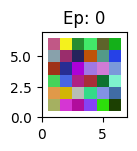

In [90]:
from our_som1 import SOM

# som = SOM(x_size, y_size, num_features)
agri_som = SOM(6,6,3)

# Initial weights
init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

Random weights (3 features) are given to each of 9 (3×3) neurons. The above figure shows how the neural network looks like in the beginning.

SOM training epoches 20
neighborhood radius  5.015752812467621
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  4.192962712629475
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  3.505144086407193
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  2.9301560515835217
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  2.449489742783178
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  2.0476725110792198
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.7117698594097055
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighborho

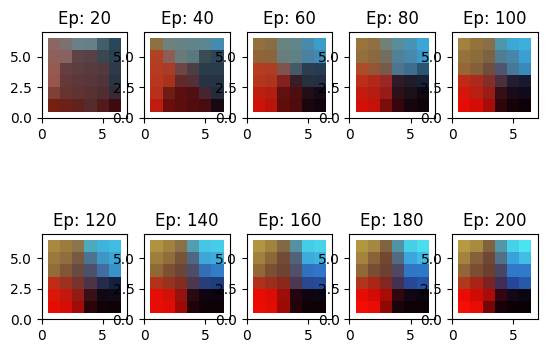

In [91]:
agri_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

Notice: 

- after 80 Epochs, the network changed from random colors (initialization) to nearly constant color; this means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data.

- Slowly, the network develops different color according to input data structures/patterns, but, you can notice similar colors are neighbors to one another.

- Since there was a random initialization, the positions of colors may change but the topology will be preserved.

## Prediction and Analysis

In [92]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:10]

,Area,Production,Yield,bmu,bmu_idx
59,0.020023,0.001584,0.024542,"[[0.038929671684279916, 0.0032372352463451164,...","[5, 0]"
94,0.053301,0.004922,0.028645,"[[0.05089438815407455, 0.0047064930702413075, ...","[4, 0]"
84,0.142835,0.013940,0.030286,"[[0.08413196055778775, 0.008200872558637667, 0...","[3, 0]"
74,0.235363,0.660199,0.870279,"[[0.22787891532087612, 0.6372139444324327, 0.8...","[4, 4]"
80,0.312332,0.946083,0.939802,"[[0.29602955850975854, 0.8929337900334942, 0.9...","[5, 5]"
68,0.165416,0.415933,0.780143,"[[0.18524904370488657, 0.47380290975505135, 0....","[4, 3]"
98,0.061309,0.006395,0.032350,"[[0.05089438815407455, 0.0047064930702413075, ...","[4, 0]"
31,0.512706,0.353071,0.213666,"[[0.5256979986254995, 0.37607519334660205, 0.2...","[1, 4]"
10,0.968655,0.048946,0.015665,"[[0.9641492132723176, 0.05101663127637776, 0.0...","[0, 0]"
33,0.582107,0.419763,0.223736,"[[0.564913708252275, 0.40160459258811926, 0.21...","[0, 3]"


Now, joininig the labelled initial data

In [93]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:10]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
59,2001/2002,2058/59,TOBACCO,3813,3763,987,0.020023,0.001584,0.024542,"[[0.038929671684279916, 0.0032372352463451164,...","[5, 0]"
94,1994/95,2051/52,JUTE,10150,11695,1152,0.053301,0.004922,0.028645,"[[0.05089438815407455, 0.0047064930702413075, ...","[4, 0]"
84,1984/85,2041/42,JUTE,27200,33124,1218,0.142835,0.013940,0.030286,"[[0.08413196055778775, 0.008200872558637667, 0...","[3, 0]"
74,1995/96,2052/53,SUGARCANE,44820,1568700,35000,0.235363,0.660199,0.870279,"[[0.22787891532087612, 0.6372139444324327, 0.8...","[4, 4]"
80,2001/2002,2058/59,SUGARCANE,59477,2247990,37796,0.312332,0.946083,0.939802,"[[0.29602955850975854, 0.8929337900334942, 0.9...","[5, 5]"
68,1989/90,2046/47,SUGARCANE,31500,988300,31375,0.165416,0.415933,0.780143,"[[0.18524904370488657, 0.47380290975505135, 0....","[4, 3]"
98,1998/99,2055/56,JUTE,11675,15195,1301,0.061309,0.006395,0.032350,"[[0.05089438815407455, 0.0047064930702413075, ...","[4, 0]"
31,1994/95,2051/52,POTATO,97634,838932,8593,0.512706,0.353071,0.213666,"[[0.5256979986254995, 0.37607519334660205, 0.2...","[1, 4]"
10,1994/95,2051/52,OILSEED,184460,116300,630,0.968655,0.048946,0.015665,"[[0.9641492132723176, 0.05101663127637776, 0.0...","[0, 0]"
33,1996/97,2053/54,POTATO,110850,997400,8998,0.582107,0.419763,0.223736,"[[0.564913708252275, 0.40160459258811926, 0.21...","[0, 3]"


Visualize how the original data gets clustered in the SOM

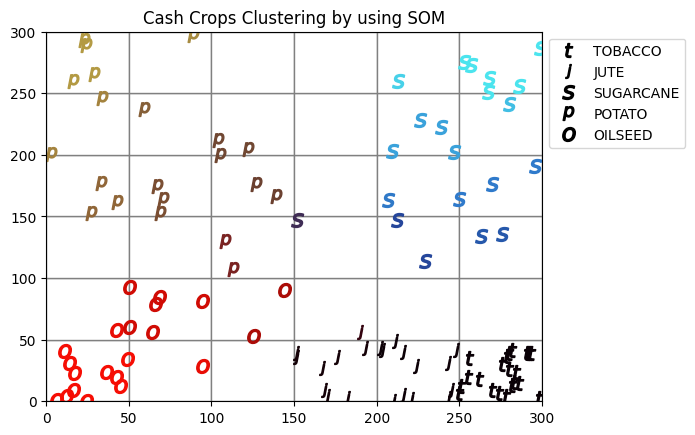

In [94]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()

In [95]:
dataT = trunc_data[data['Crop']=='TOBACCO']
print(dataT)

        Area  Production     Yield
59  0.020023    0.001584  0.024542
61  0.017844    0.001393  0.024219
58  0.022192    0.001672  0.023373
62  0.015770    0.001269  0.024965
42  0.044899    0.002706  0.018699
57  0.022491    0.001603  0.022105
43  0.045581    0.001970  0.013402
56  0.023221    0.001646  0.021981
46  0.038334    0.002264  0.018326
51  0.035404    0.002619  0.022950
53  0.032190    0.002319  0.022354
50  0.034974    0.002534  0.022478
54  0.029775    0.001885  0.019643
45  0.033976    0.001877  0.017132
52  0.031655    0.002292  0.022478
44  0.046316    0.002058  0.013775
55  0.025579    0.001618  0.019619
49  0.034238    0.002527  0.022901
48  0.038282    0.002938  0.023796
47  0.039962    0.002778  0.021558
60  0.018889    0.001456  0.023920


/var/folders/2d/sl26101n1t705nlr62lmw84r9q6c8r/T/ipykernel_74783/2686195632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='TOBACCO']


In [96]:
print(dataT.max())

Area          0.046316
Production    0.002938
Yield         0.024965
dtype: float64


In [97]:
dataT = trunc_data[data['Crop']=='JUTE']
print(dataT.min())

Area          0.047262
Production    0.004209
Yield         0.025959
dtype: float64


/var/folders/2d/sl26101n1t705nlr62lmw84r9q6c8r/T/ipykernel_74783/3067265762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='JUTE']


In [98]:
print(dataT.mean())

Area          0.077544
Production    0.007860
Yield         0.031578
dtype: float64
